In [1]:
# Manipulasi dataframe dan numerik
import pandas as pd
import numpy as np
import ast
from ast import literal_eval

# Data preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# Tools visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi training dan testing data
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold

# Algoritma machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluasi kinerja model
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, auc
from sklearn.model_selection import learning_curve

In [2]:
trans = pd.read_csv('transactions.csv')
# cust = pd.read_csv('customer.csv')
# prod = pd.read_csv('product.csv', on_bad_lines='skip')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
trans.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753


In [5]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [6]:
trans.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,852584.0,49839.202245,28999.324142,3.000000,24563.000000,49619.000000,74957.000000,9.999900e+04
promo_amount,852584.0,2042.077949,3063.481424,0.000000,0.000000,0.000000,3993.000000,2.451900e+04
shipment_fee,852584.0,9189.675152,9377.856335,0.000000,0.000000,10000.000000,10000.000000,5.000000e+04
shipment_location_lat,852584.0,-5.111961,3.081469,-10.995516,-7.377923,-6.241318,-3.088419,5.874791e+00
shipment_location_long,852584.0,110.966216,6.398510,95.030728,106.863926,110.168478,113.194940,1.410061e+02
total_amount,852584.0,549916.515169,815376.137740,10898.000000,203793.750000,302989.000000,514702.250000,2.350449e+07


In [7]:
trans.describe(include=[object]).T

,count,unique,top,freq
created_at,852584,852584,2018-07-29T15:22:01.458193Z,1
booking_id,852584,852584,186e2bee-0637-4710-8981-50c2d737bc42,1
session_id,852584,852584,3abaa6ce-e320-4e51-9469-d9f3fa328e86,1
product_metadata,852584,852566,"[{'product_id': 22822, 'quantity': 1, 'item_pr...",2
payment_method,852584,5,Credit Card,299586
payment_status,852584,2,Success,815964
promo_code,326536,8,AZ2022,89227
shipment_date_limit,852584,852584,2018-08-03T05:07:24.812676Z,1


In [8]:
trans.nunique()

created_at                852584
customer_id                50705
booking_id                852584
session_id                852584
product_metadata          852566
payment_method                 5
payment_status                 2
promo_amount               15180
promo_code                     8
shipment_fee                   6
shipment_date_limit       852584
shipment_location_lat     440963
shipment_location_long    440963
total_amount              469757
dtype: int64

In [9]:
#Melihat missing value
trans.isna().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
product_metadata               0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                526048
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
dtype: int64

In [10]:
#Melihat duplicate
trans.duplicated().sum()

0

In [11]:
# mengubah tipe data ke kategori dan date
trans[['payment_method', 'payment_status', 'promo_code']] = trans[['payment_method', 'payment_status', 'promo_code']].astype('category')
trans['shipment_date_limit'] = pd.to_datetime(trans['shipment_date_limit'])
trans['created_at'] = pd.to_datetime(trans['created_at'])

In [12]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   created_at              852584 non-null  datetime64[ns, UTC]
 1   customer_id             852584 non-null  int64              
 2   booking_id              852584 non-null  object             
 3   session_id              852584 non-null  object             
 4   product_metadata        852584 non-null  object             
 5   payment_method          852584 non-null  category           
 6   payment_status          852584 non-null  category           
 7   promo_amount            852584 non-null  int64              
 8   promo_code              326536 non-null  category           
 9   shipment_fee            852584 non-null  int64              
 10  shipment_date_limit     852584 non-null  datetime64[ns, UTC]
 11  shipment_location_lat   85

In [13]:
print(trans['product_metadata'].head())

0    [{'product_id': 54728, 'quantity': 1, 'item_pr...
1    [{'product_id': 16193, 'quantity': 1, 'item_pr...
2    [{'product_id': 53686, 'quantity': 4, 'item_pr...
3    [{'product_id': 20228, 'quantity': 1, 'item_pr...
4    [{'product_id': 55220, 'quantity': 1, 'item_pr...
Name: product_metadata, dtype: object


In [14]:
# parsing metadata dari kolom product_metadata
trans['product_metadata'] = trans['product_metadata'].fillna('{}')
trans['product_metadata'] = trans['product_metadata'].apply(literal_eval)
trans = ( trans.explode('product_metadata').reset_index(drop=True))
trans = pd.concat([trans.drop(['product_metadata'], axis=1), pd.json_normalize(trans['product_metadata'])], axis=1)

trans.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03 01:29:03.415705+00:00,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18 08:41:49.422380+00:00,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05 17:42:27.954235+00:00,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23 17:24:07.361785+00:00,-3.602334,120.363824,198753,55220,1,198753


In [15]:
# Mengubah data NaN pada kolom promo_code menjadi None
trans['promo_code'] = trans['promo_code'].cat.add_categories(['None']).fillna('None')

In [16]:
trans[['promo_code', 'promo_amount']].sample(9)

,promo_code,promo_amount
959041,None,0
818611,None,0
752421,None,0
58130,None,0
391157,None,0
1014053,None,0
1253551,SC2022,10007
703239,None,0
1228012,BUYMORE,8501


In [17]:
trans['promo_code'].isna().sum()

0

In [18]:
trans[['promo_code', 'promo_amount']].sample(9)

,promo_code,promo_amount
296821,None,0
700390,AZ2022,2254
996951,None,0
629314,None,0
454584,None,0
882521,None,0
292196,None,0
963105,None,0
463166,XX2022,3127


In [19]:
#Mencari real total amount
trans['real_total_amount'] = (trans['shipment_fee']  + trans['item_price'] * trans['quantity'] ) - trans['promo_amount']

In [20]:
trans.head(1)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,real_total_amount
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.227893,111.969107,199832,54728,1,191247,199832


In [21]:
cektrans = trans.loc[trans['customer_id'] == 3]
cektrans

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,real_total_amount
352123,2018-08-25 18:54:03.844494+00:00,3,856b0c3d-b076-406b-be11-3dfee762e9be,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,Credit Card,Success,8073,WEEKENDMANTAP,0,2018-08-27 05:08:15.817545+00:00,-6.151858,106.945839,826597,56019,5,166934,826597
352124,2018-09-22 18:42:52.844494+00:00,3,f9b17de8-5db3-40dc-9227-664c6679543c,36673b2f-940a-42b5-994d-1cce4796b55f,Credit Card,Success,0,None,10000,2018-09-25 19:14:55.732974+00:00,-8.710879,122.178317,163784,30235,1,153784,163784
352125,2018-10-20 19:07:54.844494+00:00,3,caa8be57-6239-4b5b-ae0b-e27887a13356,93e1d3c4-bed1-4ef4-b79f-e24a79e905b7,Credit Card,Success,8828,WEEKENDSERU,10000,2018-10-26 05:26:58.264371+00:00,-8.391546,115.345669,124932,7808,1,123760,124932
352126,2018-11-17 19:09:49.844494+00:00,3,688cef52-8ee7-44ea-98af-20daf0c5609b,8356370c-267e-4530-a2d3-1830e4be3f2b,Credit Card,Success,3415,WEEKENDSERU,0,2018-11-21 05:06:08.279671+00:00,-6.151858,106.945839,247902,48968,1,251317,247902
352127,2018-12-15 19:33:50.844494+00:00,3,a12fb778-d19a-4559-9808-8115f01c1595,ef7f4829-e7d1-4513-861b-1fbbc6e41bbf,Credit Card,Success,2645,LIBURDONG,10000,2018-12-18 21:15:53.089926+00:00,-0.988670,109.794413,181237,59272,1,173882,181237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352189,2022-03-06 13:28:13.844494+00:00,3,9d63d16e-6d6a-4338-a7cd-b63a9b17b013,fa841e98-0b8a-413d-ba51-d6e8f66a7483,Credit Card,Success,0,None,0,2022-03-10 12:57:11.352569+00:00,-6.151858,106.945839,1445621,51710,2,203419,406838
352190,2022-04-03 13:04:37.844494+00:00,3,1d8f3929-0598-4f64-ae8e-4d2cbfc82b3f,ed310633-fed6-4b44-91fd-b466fe63de71,Credit Card,Success,5228,WEEKENDMANTAP,25000,2022-04-06 13:19:28.950301+00:00,-4.672859,104.692439,156445,10253,1,136673,156445
352191,2022-05-01 14:17:11.844494+00:00,3,858ee537-feff-4ea8-b39e-b0c5dee3a7db,4ef0f146-82f3-44f4-9bd6-e4a62292f165,Credit Card,Success,8051,WEEKENDSERU,10000,2022-05-04 01:28:05.416704+00:00,-6.151858,106.945839,293713,36752,1,291764,293713
352192,2022-05-29 15:12:46.844494+00:00,3,cafec349-636d-454d-998b-63541befd257,43c80e8a-5367-42cb-bd03-5556045e582a,Debit Card,Success,0,None,10000,2022-06-02 11:59:04.059103+00:00,-2.175659,115.419473,296374,48242,1,286374,296374


In [22]:
transactions = trans.copy()
custTrans = transactions.groupby(['customer_id']).agg(
                          total_transactions = pd.NamedAgg(column = 'booking_id', aggfunc = len),
                          first_transaction = pd.NamedAgg(column = 'created_at', aggfunc = min),
                          latest_transaction = pd.NamedAgg(column = 'created_at', aggfunc = max),
                          total_quantity = pd.NamedAgg(column = 'quantity', aggfunc = sum),
                          total_shipment_fee = pd.NamedAgg(column = 'shipment_fee', aggfunc = sum),
                          total_promo_amount = pd.NamedAgg(column = 'promo_amount', aggfunc = sum),
                          total_amount=pd.NamedAgg(column='real_total_amount', aggfunc=sum),
                          )
custTrans.reset_index(inplace=True)
custTrans.head()

,customer_id,total_transactions,first_transaction,latest_transaction,total_quantity,total_shipment_fee,total_promo_amount,total_amount
0,3,71,2018-08-25 18:54:03.844494+00:00,2022-06-26 15:41:52.844494+00:00,88,495000,183397,21343574
1,8,8,2021-02-13 09:47:39.656991+00:00,2022-05-15 22:46:22.656991+00:00,19,55000,7699,3908561
2,9,8,2021-06-27 01:51:48.421034+00:00,2022-05-28 08:44:32.421034+00:00,10,45000,0,2648665
3,11,1,2022-03-07 14:29:13.759159+00:00,2022-03-07 14:29:13.759159+00:00,1,15000,9492,197533
4,15,9,2019-09-30 04:47:36.105040+00:00,2022-01-05 06:07:58.105040+00:00,9,90000,16362,2174870


In [23]:
custTrans['first_transaction'] = pd.to_datetime(custTrans['first_transaction'].dt.strftime("%Y-%m-%d"))
custTrans['latest_transaction'] = pd.to_datetime(custTrans['latest_transaction'].dt.strftime("%Y-%m-%d"))
custTrans.head()

,customer_id,total_transactions,first_transaction,latest_transaction,total_quantity,total_shipment_fee,total_promo_amount,total_amount
0,3,71,2018-08-25,2022-06-26,88,495000,183397,21343574
1,8,8,2021-02-13,2022-05-15,19,55000,7699,3908561
2,9,8,2021-06-27,2022-05-28,10,45000,0,2648665
3,11,1,2022-03-07,2022-03-07,1,15000,9492,197533
4,15,9,2019-09-30,2022-01-05,9,90000,16362,2174870


In [24]:
# Melihat sudah berapa hari customer melakukan terakhir transaksi
custTrans['recency'] = (custTrans['latest_transaction'].max() - custTrans['latest_transaction']).dt.days
custTrans.head()

#berarti transaksi terakhir terjadi 35 hari yang lalu pada cust dgn no id 3

,customer_id,total_transactions,first_transaction,latest_transaction,total_quantity,total_shipment_fee,total_promo_amount,total_amount,recency
0,3,71,2018-08-25,2022-06-26,88,495000,183397,21343574,35
1,8,8,2021-02-13,2022-05-15,19,55000,7699,3908561,77
2,9,8,2021-06-27,2022-05-28,10,45000,0,2648665,64
3,11,1,2022-03-07,2022-03-07,1,15000,9492,197533,146
4,15,9,2019-09-30,2022-01-05,9,90000,16362,2174870,207


In [25]:
# # rumus untuk mengetahui total amount
# custTrans['real_total_amount'] = (custTrans['shipment_fee']  + custTrans['item_price'] * custTrans['quantity'] ) - custTrans['promo_amount']

In [26]:
cekcust = custTrans.loc[custTrans['customer_id'] == 3]
cekcust

,customer_id,total_transactions,first_transaction,latest_transaction,total_quantity,total_shipment_fee,total_promo_amount,total_amount,recency
0,3,71,2018-08-25,2022-06-26,88,495000,183397,21343574,35


## Melihat dari 1 bulan belakang

In [27]:
transactions = trans.copy()
# Tentukan tanggal referensi berdasarkan tanggal terbaru di dataset
reference_date = transactions['created_at'].max()

# Tentukan batas 6 bulan terakhir
one_month_ago = reference_date - pd.DateOffset(months=1)

# Filter data untuk 6 bulan terakhir
df = transactions[transactions['created_at'] >= one_month_ago]

In [28]:
df.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,real_total_amount
195,2022-07-08 18:02:01.162570+00:00,58191,e03c7345-b4f9-4d0d-b53c-b039f0b2fdb8,da19c53e-6ccf-40d9-bfe1-5bb1aea42680,OVO,Success,9376,BUYMORE,10000,2022-07-12 20:12:47.620520+00:00,-2.897258,120.314504,171940,6973,1,171316,171940
508,2022-07-10 07:47:34.145153+00:00,22811,c932335e-801b-4fdd-93e8-989297b515c5,1a7da54a-c0ae-4802-a363-4e07c5691dc7,OVO,Success,0,None,0,2022-07-16 04:16:43.265703+00:00,-7.190976,107.700094,1216821,52942,1,264225,264225
509,2022-07-10 07:47:34.145153+00:00,22811,c932335e-801b-4fdd-93e8-989297b515c5,1a7da54a-c0ae-4802-a363-4e07c5691dc7,OVO,Success,0,None,0,2022-07-16 04:16:43.265703+00:00,-7.190976,107.700094,1216821,4262,1,397955,397955
510,2022-07-10 07:47:34.145153+00:00,22811,c932335e-801b-4fdd-93e8-989297b515c5,1a7da54a-c0ae-4802-a363-4e07c5691dc7,OVO,Success,0,None,0,2022-07-16 04:16:43.265703+00:00,-7.190976,107.700094,1216821,34136,1,254217,254217
511,2022-07-10 07:47:34.145153+00:00,22811,c932335e-801b-4fdd-93e8-989297b515c5,1a7da54a-c0ae-4802-a363-4e07c5691dc7,OVO,Success,0,None,0,2022-07-16 04:16:43.265703+00:00,-7.190976,107.700094,1216821,49851,1,158089,158089


In [29]:
custTrans = df.groupby(['customer_id']).agg(
                          total_transactions = pd.NamedAgg(column = 'booking_id', aggfunc = len),
                          first_transaction = pd.NamedAgg(column = 'created_at', aggfunc = min),
                          latest_transaction = pd.NamedAgg(column = 'created_at', aggfunc = max),
                          total_quantity = pd.NamedAgg(column = 'quantity', aggfunc = sum),
                          total_shipment_fee = pd.NamedAgg(column = 'shipment_fee', aggfunc = sum),
                          total_promo_amount = pd.NamedAgg(column = 'promo_amount', aggfunc = sum),
                          total_amount=pd.NamedAgg(column='real_total_amount', aggfunc=sum),
                          )
custTrans.reset_index(inplace=True)
custTrans.head()

,customer_id,total_transactions,first_transaction,latest_transaction,total_quantity,total_shipment_fee,total_promo_amount,total_amount
0,18,1,2022-07-02 20:35:34.010289+00:00,2022-07-02 20:35:34.010289+00:00,1,10000,0,176789
1,20,11,2022-07-01 10:40:22.615854+00:00,2022-07-16 11:22:47.615854+00:00,22,90000,0,5257643
2,28,1,2022-07-09 01:18:38.822544+00:00,2022-07-09 01:18:38.822544+00:00,2,0,0,618784
3,45,1,2022-07-13 09:23:46.564007+00:00,2022-07-13 09:23:46.564007+00:00,1,10000,4439,251543
4,76,1,2022-07-07 08:27:55.589567+00:00,2022-07-07 08:27:55.589567+00:00,1,0,0,103622


In [30]:
custTrans['first_transaction'] = pd.to_datetime(custTrans['first_transaction'].dt.strftime("%Y-%m-%d"))
custTrans['latest_transaction'] = pd.to_datetime(custTrans['latest_transaction'].dt.strftime("%Y-%m-%d"))
custTrans.head()

,customer_id,total_transactions,first_transaction,latest_transaction,total_quantity,total_shipment_fee,total_promo_amount,total_amount
0,18,1,2022-07-02,2022-07-02,1,10000,0,176789
1,20,11,2022-07-01,2022-07-16,22,90000,0,5257643
2,28,1,2022-07-09,2022-07-09,2,0,0,618784
3,45,1,2022-07-13,2022-07-13,1,10000,4439,251543
4,76,1,2022-07-07,2022-07-07,1,0,0,103622


In [31]:
# Melihat sudah berapa hari customer melakukan terakhir transaksi
custTrans['recency'] = (custTrans['latest_transaction'].max() - custTrans['latest_transaction']).dt.days
custTrans.head()

#berarti transaksi terakhir terjadi 35 hari yang lalu pada cust dgn no id 3

,customer_id,total_transactions,first_transaction,latest_transaction,total_quantity,total_shipment_fee,total_promo_amount,total_amount,recency
0,18,1,2022-07-02,2022-07-02,1,10000,0,176789,29
1,20,11,2022-07-01,2022-07-16,22,90000,0,5257643,15
2,28,1,2022-07-09,2022-07-09,2,0,0,618784,22
3,45,1,2022-07-13,2022-07-13,1,10000,4439,251543,18
4,76,1,2022-07-07,2022-07-07,1,0,0,103622,24


In [32]:
trans = custTrans.copy()
trans = custTrans.rename(columns={"total_transactions": "frequency", 'total_amount':'monetary'})

In [33]:
trans.head()

,customer_id,frequency,first_transaction,latest_transaction,total_quantity,total_shipment_fee,total_promo_amount,monetary,recency
0,18,1,2022-07-02,2022-07-02,1,10000,0,176789,29
1,20,11,2022-07-01,2022-07-16,22,90000,0,5257643,15
2,28,1,2022-07-09,2022-07-09,2,0,0,618784,22
3,45,1,2022-07-13,2022-07-13,1,10000,4439,251543,18
4,76,1,2022-07-07,2022-07-07,1,0,0,103622,24


In [34]:
trans.loc[:, ['customer_id','recency', 'frequency', 'monetary']]

,customer_id,recency,frequency,monetary
0,18,29,1,176789
1,20,15,11,5257643
2,28,22,1,618784
3,45,18,1,251543
4,76,24,1,103622
...,...,...,...,...
10218,99936,12,14,3894500
10219,99976,17,5,1033895
10220,99986,22,1,379377
10221,99988,27,3,706629


# Methodology (Machine Learning)

## RFM segmentation
RFM adalah singkatan dari *Recency, Frequency,* dan *Monetary*. Tiap faktor menyesuaikan dengan ciri-ciri dari *customer*. Metrik RFM ini merupakan indikator penting dari segmentasi perilaku *customer* karena *frequency* dan *monetary* memengaruhi *customer lifetime value*, dan *recency* memengaruhi *engagement rate.*

### Data (Machine Learning):
- Unit Analysis:
  - Customer behavior: Customer Unique ID

- Features:
  - Recency: Mengukur dari kapan terakhir kali seorang customer melakukan transaksi.  

  - Frequency: Mengukur dari seberapa sering seorang customer melakukan transaksi.

  - Monetary: Mengukur dari total transaksi yang dilakukan seorang customer.

In [35]:
RFM_trans = trans.loc[:, ['customer_id','recency', 'frequency', 'monetary']]
RFM_trans

,customer_id,recency,frequency,monetary
0,18,29,1,176789
1,20,15,11,5257643
2,28,22,1,618784
3,45,18,1,251543
4,76,24,1,103622
...,...,...,...,...
10218,99936,12,14,3894500
10219,99976,17,5,1033895
10220,99986,22,1,379377
10221,99988,27,3,706629


#### Recency
*Kapan terakhir kali pelanggan membuat
pembelian?*

> Nilai Recency adalah menunjukkan waktu interaksi terakhir pelanggan dengan produk. Nilai recency yang lebih kecil berarti pelanggan mengunjungi perusahaan berulang kali dalam jangka waktu yang singkat. Demikian pula, nilai yang lebih besar berarti semakin kecil kemungkinan pelanggan untuk mengunjungi perusahaan dalam waktu dekat.



In [36]:
Q = trans['recency'].quantile([0.25, 0.5, 0.75])
Q

0.25     6.0
0.50    14.0
0.75    22.0
Name: recency, dtype: float64

In [37]:
def segment_recency(recency):
  if recency <= Q[0.25]:
    return 'active'
  elif recency <= Q[0.5]:
    return 'warm'
  elif recency <= Q[0.75]:
    return 'cold'
  else:
    return 'inactive'
RFM_trans['segment_recency'] = RFM_trans['recency'].apply(segment_recency)
RFM_trans[['customer_id', 'recency', 'segment_recency']]

,customer_id,recency,segment_recency
0,18,29,inactive
1,20,15,cold
2,28,22,cold
3,45,18,cold
4,76,24,inactive
...,...,...,...
10218,99936,12,warm
10219,99976,17,cold
10220,99986,22,cold
10221,99988,27,inactive


In [38]:
RFM_trans['segment_recency'].value_counts()

active      2639
warm        2610
inactive    2523
cold        2451
Name: segment_recency, dtype: int64

In [39]:
R = RFM_trans.groupby('segment_recency').agg({
    'customer_id': pd.Series.nunique
}).reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


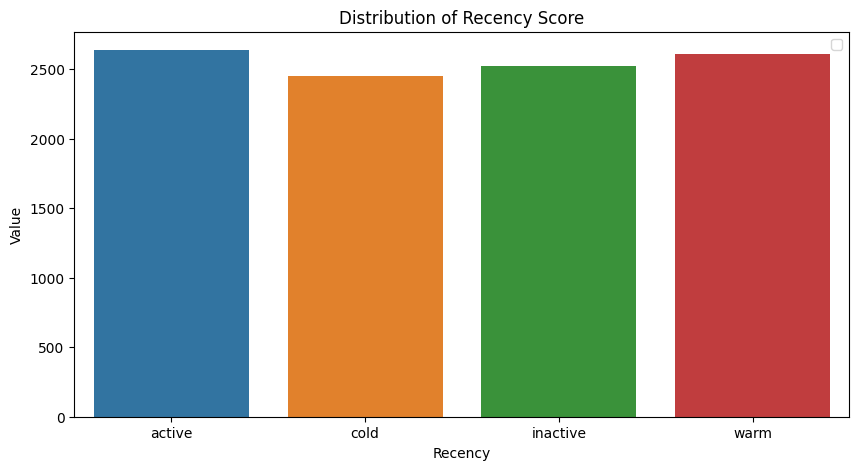

In [40]:
plt.figure(figsize=(10, 5))
sns.barplot(x='segment_recency', y='customer_id', data=R)
# Menambahkan label, judul dan legenda
plt.xlabel('Recency')
plt.ylabel('Value')
plt.title('Distribution of Recency Score')
plt.legend()

#### Frequency
*Berapa kali pelanggan membeli?*

> Frekuensi didefinisikan sebagai jumlah pembelian seorang pelanggan
menghasilkan dalam periode tertentu.


In [41]:
Q_f = trans['frequency'].quantile([0.25, 0.5, 0.75])
Q_f

0.25    1.0
0.50    2.0
0.75    4.0
Name: frequency, dtype: float64

In [42]:
def segment_freq(frequency):
  if frequency <= Q_f[0.25]:
    return 'low'
  elif frequency <= Q_f[0.5]:
    return 'medium'
  elif frequency <= Q_f[0.75]:
    return 'high'
  else:
    return 'special'
RFM_trans['segment_freq'] = RFM_trans['frequency'].apply(segment_freq)
RFM_trans[['customer_id', 'frequency', 'segment_freq']]

,customer_id,frequency,segment_freq
0,18,1,low
1,20,11,special
2,28,1,low
3,45,1,low
4,76,1,low
...,...,...,...
10218,99936,14,special
10219,99976,5,special
10220,99986,1,low
10221,99988,3,high


In [43]:
RFM_trans['segment_freq'].value_counts()

low        4509
special    2096
medium     1965
high       1653
Name: segment_freq, dtype: int64

In [44]:
F = RFM_trans.groupby('segment_freq').agg({
    'customer_id': pd.Series.nunique
}).reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


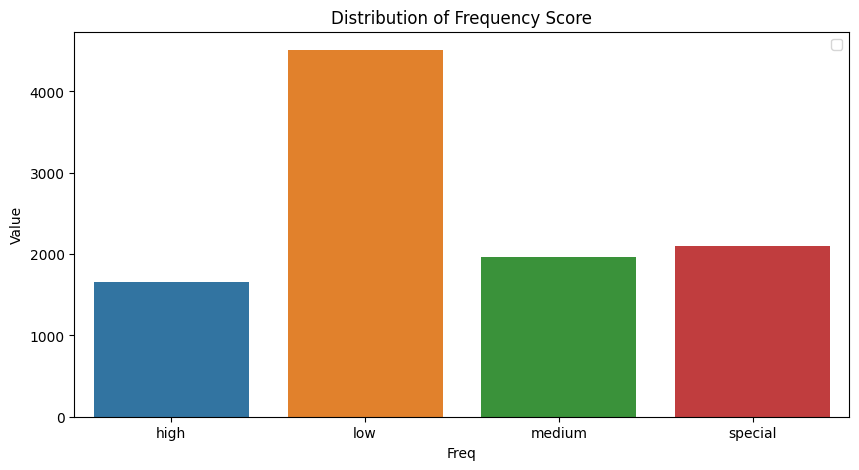

In [45]:
plt.figure(figsize=(10, 5))
sns.barplot(x='segment_freq', y='customer_id', data=F)
# Menambahkan label, judul dan legenda
plt.xlabel('Freq')
plt.ylabel('Value')
plt.title('Distribution of Frequency Score')
plt.legend()

#### Monetary
*Berapa banyak uang yang dikeluarkan pelanggan?*
> Moneter didefinisikan sebagai jumlah uang yang dikeluarkan oleh pelanggan selama periode tertentu. Semakin tinggi nilai monetary, semakin besar kontribusi pelanggan terhadap pendapatan bisnis.



In [46]:
Q_m = trans['monetary'].quantile([0.25, 0.5, 0.75])
Q_m

0.25     284410.0
0.50     574290.0
0.75    1434596.5
Name: monetary, dtype: float64

In [47]:
def segment_monetary(monetary):
  if monetary <= Q_m[0.25]:
    return 'low'
  elif monetary <= Q_m[0.5]:
    return 'medium'
  elif monetary <= Q_m[0.75]:
    return 'high'
  else:
    return 'special'
RFM_trans['segment_monetary'] = RFM_trans['monetary'].apply(segment_monetary)
RFM_trans[['customer_id', 'monetary', 'segment_monetary']]

,customer_id,monetary,segment_monetary
0,18,176789,low
1,20,5257643,special
2,28,618784,high
3,45,251543,low
4,76,103622,low
...,...,...,...
10218,99936,3894500,special
10219,99976,1033895,high
10220,99986,379377,medium
10221,99988,706629,high


In [48]:
RFM_trans['segment_monetary'].value_counts()

low        2556
special    2556
medium     2556
high       2555
Name: segment_monetary, dtype: int64

In [49]:
M = RFM_trans.groupby('segment_monetary').agg({
    'customer_id': pd.Series.nunique
}).reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


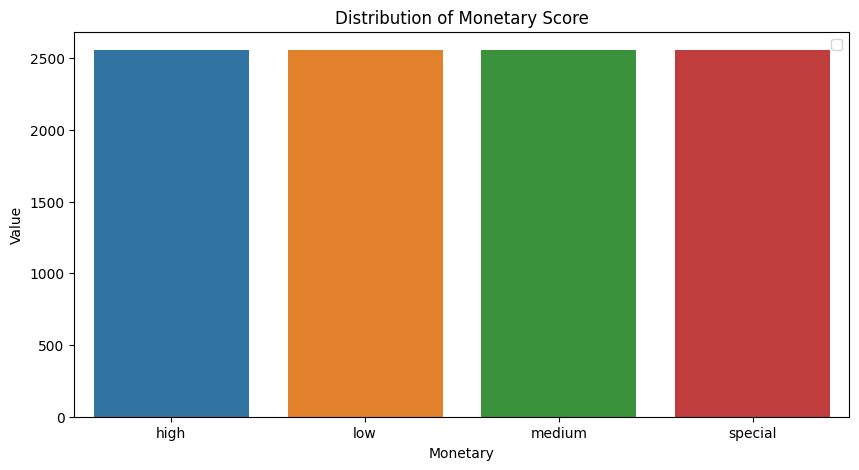

In [50]:
plt.figure(figsize=(10, 5))
sns.barplot(x='segment_monetary', y='customer_id', data=M)
# Menambahkan label, judul dan legenda
plt.xlabel('Monetary')
plt.ylabel('Value')
plt.title('Distribution of Monetary Score')
plt.legend()

In [51]:
RFM_trans

,customer_id,recency,frequency,monetary,segment_recency,segment_freq,segment_monetary
0,18,29,1,176789,inactive,low,low
1,20,15,11,5257643,cold,special,special
2,28,22,1,618784,cold,low,high
3,45,18,1,251543,cold,low,low
4,76,24,1,103622,inactive,low,low
...,...,...,...,...,...,...,...
10218,99936,12,14,3894500,warm,special,special
10219,99976,17,5,1033895,cold,special,high
10220,99986,22,1,379377,cold,low,medium
10221,99988,27,3,706629,inactive,high,high


## K-Means

#### Standardize the data

In [52]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(RFM_trans.loc[:, ['recency', 'frequency', 'monetary']])
df_scaled = pd.DataFrame(df_scaled, columns=['recency', 'frequency', 'monetary'])
df_scaled

,recency,frequency,monetary
0,0.966667,0.000000,0.003275
1,0.500000,0.082645,0.111268
2,0.733333,0.000000,0.012669
3,0.600000,0.000000,0.004864
4,0.800000,0.000000,0.001720
...,...,...,...
10218,0.400000,0.107438,0.082294
10219,0.566667,0.033058,0.021493
10220,0.733333,0.000000,0.007581
10221,0.900000,0.016529,0.014537


#### Determine the optimal number of clusters

C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

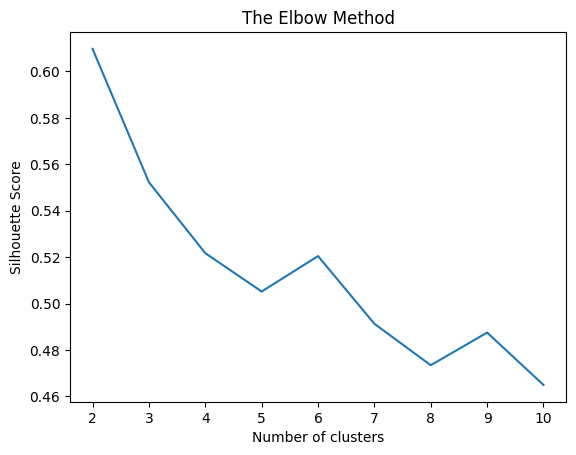

In [53]:
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    scores.append(score)

plt.plot(range(2, 11), scores)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

#### Apply K-Means Clustering

In [54]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [55]:
df_scaled["Cluster"] = kmeans.labels_
df_scaled.head()

,recency,frequency,monetary,Cluster
0,0.966667,0.000000,0.003275,2
1,0.500000,0.082645,0.111268,0
2,0.733333,0.000000,0.012669,2
3,0.600000,0.000000,0.004864,0
4,0.800000,0.000000,0.001720,2


#### Plot Cluster

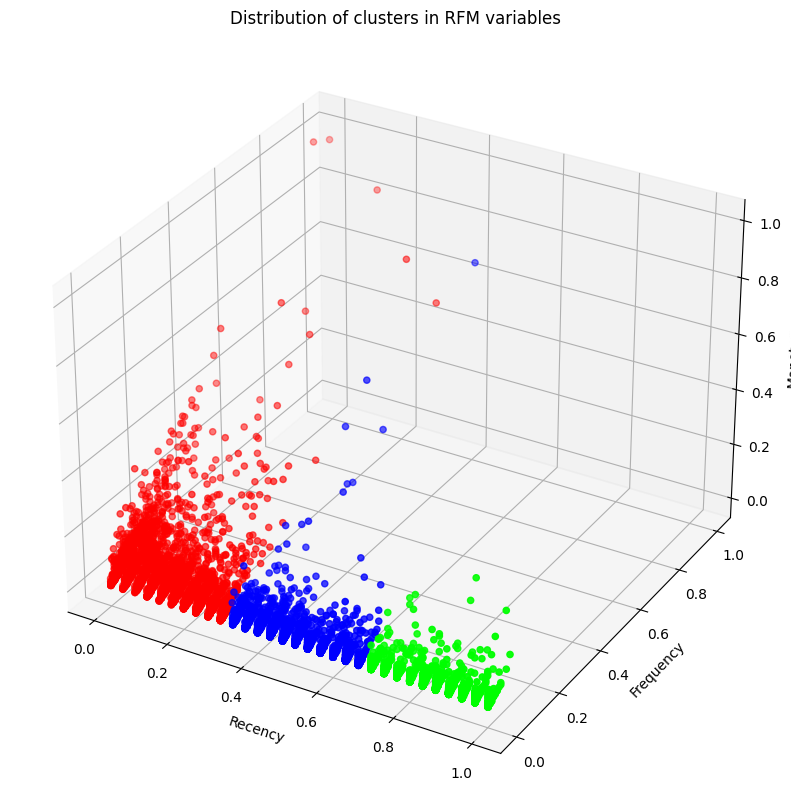

In [61]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_scaled['recency'], df_scaled['frequency'], df_scaled['monetary'] , cmap = 'brg', c = df_scaled['Cluster'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('Distribution of clusters in RFM variables')
plt.show()

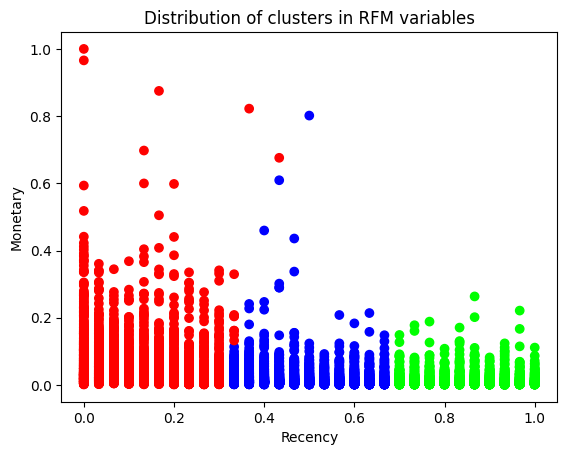

In [57]:
plt.scatter(df_scaled['recency'],  df_scaled['monetary'] , cmap = 'brg', c = df_scaled['Cluster'])
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Distribution of clusters in RFM variables')
plt.show()

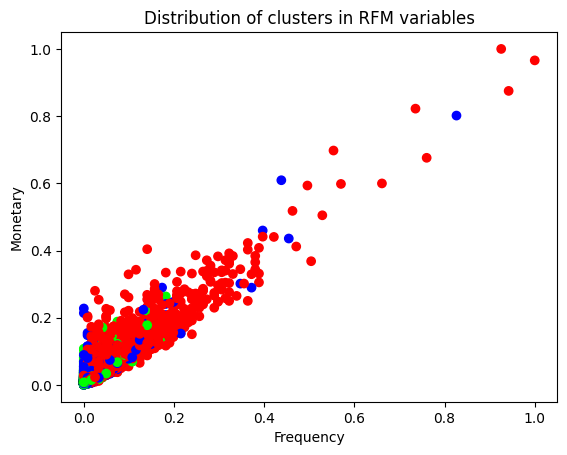

In [58]:
plt.scatter(df_scaled['frequency'],  df_scaled['monetary'] , cmap = 'brg', c = df_scaled['Cluster'])
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Distribution of clusters in RFM variables')
plt.show()

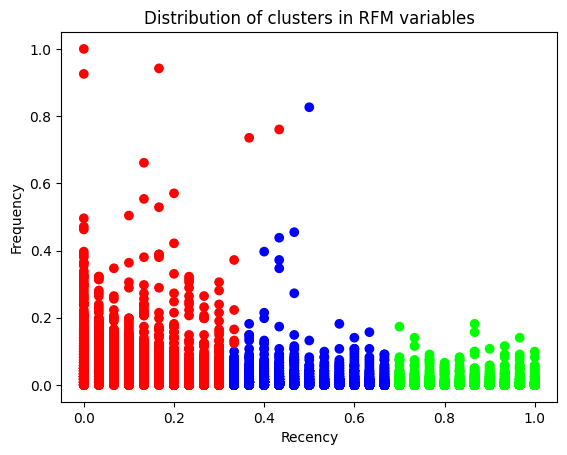

In [59]:
plt.scatter(df_scaled['recency'],  df_scaled['frequency'] , cmap = 'brg', c = df_scaled['Cluster'])
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Distribution of clusters in RFM variables')
plt.show()